## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [28]:
df = pd.read_csv("QueryResults.csv")
df.rename(columns={"m": "Date"}, inplace=True)


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [29]:
print(df.head())
print(df.tail())

                  Date   TagName  Unnamed: 2
0  2008-07-01 00:00:00        c#           3
1  2008-08-01 00:00:00  assembly           8
2  2008-08-01 00:00:00         c          83
3  2008-08-01 00:00:00        c#         505
4  2008-08-01 00:00:00       c++         164
                     Date TagName  Unnamed: 2
2519  2023-09-01 00:00:00     php        1915
2520  2023-09-01 00:00:00  python        9708
2521  2023-09-01 00:00:00       r        2130
2522  2023-09-01 00:00:00    ruby         200
2523  2023-09-01 00:00:00   swift         964


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [30]:
df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [31]:
df.count()

Date          2524
TagName       2524
Unnamed: 2    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [32]:
grouped_df = df.groupby("TagName").sum()
grouped_df

,Date,Unnamed: 2
TagName,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43337
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,399577
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1602676
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,799477
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51277
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,70917
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1906795
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2512044
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67868


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [33]:
df.groupby("TagName").count()

,Date,Unnamed: 2
TagName,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [34]:
df.Date = pd.to_datetime(df.Date)

In [35]:
df

,Date,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164
...,...,...,...
2519,2023-09-01,php,1915
2520,2023-09-01,python,9708
2521,2023-09-01,r,2130
2522,2023-09-01,ruby,200


## Data Manipulation

In [36]:
reshaped_df = df.pivot(
    index="Date",
    columns="TagName",
    values="Unnamed: 2"
)
reshaped_df.dropna()
reshaped_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,174.0,1049.0,3833.0,1781.0,114.0,417.0,4180.0,7774.0,54.0,1971.0,11800.0,2866.0,255.0,998.0
2023-06-01,155.0,890.0,3811.0,1815.0,117.0,521.0,4294.0,7535.0,54.0,1906.0,11279.0,2665.0,226.0,1132.0
2023-07-01,163.0,919.0,3882.0,1858.0,99.0,525.0,4080.0,7553.0,69.0,1750.0,11174.0,2364.0,224.0,1158.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [37]:
reshaped_df.shape

(183, 14)

In [38]:
reshaped_df.count()

TagName
assembly      182
c             182
c#            183
c++           182
delphi        182
go            167
java          182
javascript    182
perl          182
php           182
python        182
r             180
ruby          182
swift         174
dtype: int64

In [39]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [40]:
reshaped_df.fillna(0, inplace=True)

In [41]:
reshaped_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1640.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,174.0,1049.0,3833.0,1781.0,114.0,417.0,4180.0,7774.0,54.0,1971.0,11800.0,2866.0,255.0,998.0
2023-06-01,155.0,890.0,3811.0,1815.0,117.0,521.0,4294.0,7535.0,54.0,1906.0,11279.0,2665.0,226.0,1132.0
2023-07-01,163.0,919.0,3882.0,1858.0,99.0,525.0,4080.0,7553.0,69.0,1750.0,11174.0,2364.0,224.0,1158.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

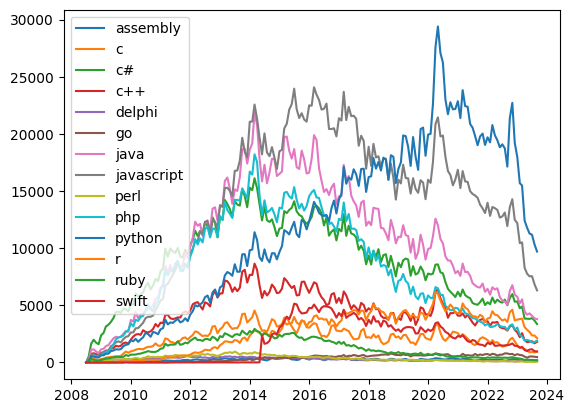

In [54]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)
plt.legend()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [64]:
smooth_df = reshaped_df.rolling(window=12).mean().fillna(0)

In [65]:
smooth_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,213.416667,1521.750000,5054.416667,2688.916667,120.833333,667.416667,5464.666667,11672.333333,91.166667,2778.583333,17538.166667,3743.333333,368.916667,1404.750000
2023-06-01,206.416667,1465.583333,4929.166667,2582.333333,121.416667,654.083333,5345.166667,11243.916667,85.416667,2670.750000,16909.250000,3641.250000,352.083333,1372.583333
2023-07-01,203.083333,1426.583333,4816.416667,2486.916667,120.000000,640.666667,5233.916667,10808.583333,80.666667,2557.416667,16249.916667,3532.750000,337.000000,1346.250000


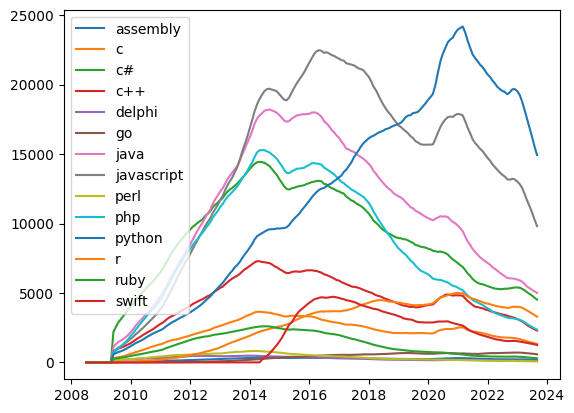

In [66]:
for column in smooth_df.columns:
    plt.plot(smooth_df.index, smooth_df[column], label=smooth_df[column].name)
plt.legend()